<a href="https://colab.research.google.com/github/kananglv/FIFA-ranks-visualisation/blob/main/fifa_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go

file_path = '/content/fifa national team.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

df_long = df.melt(id_vars=["Unnamed: 0"], var_name="Date", value_name="Team")
df_long["Date"] = pd.to_datetime(df_long["Date"], errors='coerce')
df_long = df_long.rename(columns={"Unnamed: 0": "Rank"})

df_top10 = df_long[df_long["Rank"] <= 10]

pivot_df = df_top10.pivot(index="Date", columns="Team", values="Rank")
pivot_df = pivot_df.sort_index()

country_colors = {
    'Brazil': '#FFFF00',
    'France': '#002395',
    'Germany': '#000000',
    'Argentina': '#6BB6FF',
    'Spain': '#808000',
    'Italy': '#0000FF',
    'Austria': '#ED2939',
    'Wales': '#016A16',
    'Belgium': '#BC002D',
    'Chile': '#0033A0',
    'Colombia': '#DAA520',
    'Croatia': '#6A5ACD',
    'Denmark': '#D80621',
    'England': '#B0BEC5',
    'Mexico': '#006341',
    'Netherlands': '#FF4F00',
    'Peru': '#5C4033',
    'Poland': '#E60026',
    'Portugal': '#00853F',
    'Romania': '#FFD700',
    'Switzerland': '#FF0000',
    'Uruguay': '#78C0E0',
    'USA': '#3C3B6E',
}
fig = go.Figure()

for team in pivot_df.columns:
    fig.add_trace(go.Scatter(
        x=pivot_df.index,
        y=pivot_df[team],
        mode='lines+markers',
        name=team,
        line=dict(color=country_colors.get(team, '#999999'), width=1),
        connectgaps=False
    ))

fig.update_layout(
    title='FIFA Men’s Top 10 Teams Ranking Over Last Decade (Interactive)',
    xaxis_title='Date',
    yaxis_title='Rank',
    yaxis_autorange='reversed',
    hovermode='x unified',
    template='plotly_white',
    height=400,
    width=1000,
    legend_itemclick='toggle',
    legend_itemdoubleclick='toggleothers'
)

fig.update_yaxes(dtick=1)

fig.show()


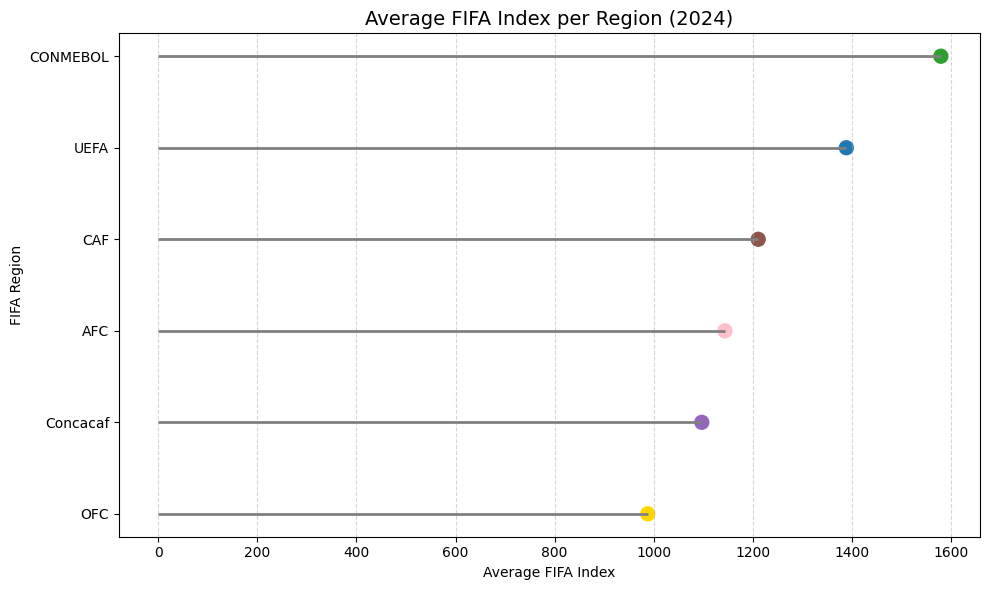

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_excel("fifa national team.xlsx", sheet_name="Rank per region")

df_clean = df_raw.T.reset_index()
df_clean.columns = df_clean.iloc[0]
df_clean = df_clean.iloc[1:]

region_names = df_clean.columns[1:]
region_values = df_clean.iloc[0, 1:].values

df_plot = pd.DataFrame({
    "FIFA Region": region_names,
    "Average Index": pd.to_numeric(region_values)
})

df_plot = df_plot.sort_values(by="Average Index", ascending=True)

region_colors = {
    "CONMEBOL": "#2CA02C",
    "UEFA": "#1F77B4",
    "Concacaf": "#9467BD",
    "CAF": "#8C564B",
    "AFC": "#FFC0CB",
    "OFC": "#FFD700",
}

df_plot["Color"] = df_plot["FIFA Region"].map(region_colors)

plt.figure(figsize=(10, 6))
plt.hlines(y=df_plot["FIFA Region"], xmin=0, xmax=df_plot["Average Index"], color="gray", linewidth=2)
plt.scatter(df_plot["Average Index"], df_plot["FIFA Region"], color=df_plot["Color"], s=100)

plt.title("Average FIFA Index per Region (2024)", fontsize=14)
plt.xlabel("Average FIFA Index")
plt.ylabel("FIFA Region")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()